In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
calender=pd.read_csv('calendar1.csv')
list1=pd.read_csv('listings.csv')
list2=pd.read_csv('listings1.csv')
review1=pd.read_csv('reviews.csv')
review2=pd.read_csv('reviews1.csv')
#df4=pd.read_csv('listings1.csv')
neighbourdata=pd.read_csv('neighbourhoods.csv')

In [3]:
calender.head()


,listing_id,date,available,price
0,635756,2019-11-14,t,$67.00
1,292285,2019-11-14,f,NaN
2,292285,2019-11-13,f,NaN
3,292285,2019-11-12,f,NaN
4,292285,2019-11-11,f,NaN


In [4]:
list1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328
2,8095,Sunset Cliffs Studio,270,Marin,NaN,Ocean Beach,32.735170,-117.243793,Entire home/apt,84,2,178,2015-11-02,1.56,1,0
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.731884,-117.119180,Entire home/apt,69,3,338,2018-11-07,3.33,1,273
4,45429,OB cottage SD--view on waterway,197919,Melissa,NaN,Loma Portal,32.748768,-117.229371,Entire home/apt,160,2,6,2014-07-28,0.06,1,363


In [5]:
list1.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.192200e+04,1.192200e+04,0.0,11922.000000,11922.000000,11922.000000,11922.000000,11922.000000,9759.000000,11922.00000,11922.000000
mean,1.728569e+07,6.085778e+07,NaN,32.770292,-117.181854,212.707851,4.653162,28.900436,1.935757,10.32612,152.486412
std,8.205400e+06,5.850494e+07,NaN,0.065639,0.064335,306.991755,14.482572,51.470547,2.056274,26.20795,131.039167
min,6.000000e+00,2.900000e+01,NaN,32.532614,-117.281401,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,1.159462e+07,1.224305e+07,NaN,32.726506,-117.245726,80.000000,1.000000,1.000000,0.360000,1.00000,22.000000
50%,1.859936e+07,3.869078e+07,NaN,32.759515,-117.168460,130.000000,2.000000,8.000000,1.140000,2.00000,132.000000
75%,2.403747e+07,9.505083e+07,NaN,32.799578,-117.141241,249.000000,3.000000,33.000000,2.950000,5.00000,287.000000
max,3.004997e+07,2.251816e+08,NaN,33.086065,-116.933520,10000.000000,500.000000,686.000000,18.950000,161.00000,365.000000


In [6]:
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f,1,3.33
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f,1,0.06


In [7]:
list2.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.192200e+04,1.192200e+04,0.0,0.0,0.0,1.192200e+04,0.0,11916.000000,11916.000000,0.0,...,9629.000000,9623.000000,9627.000000,9612.000000,9621.000000,9609.000000,9607.000000,4.800000e+01,11922.00000,9759.000000
mean,1.728569e+07,2.018112e+13,NaN,NaN,NaN,6.085778e+07,NaN,40.532561,40.532561,NaN,...,95.263994,9.706329,9.589903,9.833437,9.820809,9.751067,9.519933,9.749303e+07,10.32612,1.935757
std,8.205400e+06,5.453354e+00,NaN,NaN,NaN,5.850494e+07,NaN,188.505044,188.505044,NaN,...,6.874241,0.696525,0.794416,0.577590,0.593369,0.579499,0.791108,3.547929e+08,26.20795,2.056274
min,6.000000e+00,2.018112e+13,NaN,NaN,NaN,2.900000e+01,NaN,0.000000,0.000000,NaN,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.056300e+05,1.00000,0.010000
25%,1.159462e+07,2.018112e+13,NaN,NaN,NaN,1.224305e+07,NaN,1.000000,1.000000,NaN,...,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,6.069060e+05,1.00000,0.360000
50%,1.859936e+07,2.018112e+13,NaN,NaN,NaN,3.869078e+07,NaN,2.000000,2.000000,NaN,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.239040e+05,2.00000,1.140000
75%,2.403747e+07,2.018112e+13,NaN,NaN,NaN,9.505083e+07,NaN,7.000000,7.000000,NaN,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.268865e+05,5.00000,2.950000
max,3.004997e+07,2.018112e+13,NaN,NaN,NaN,2.251816e+08,NaN,2488.000000,2488.000000,NaN,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.011643e+09,161.00000,18.950000


In [8]:
review1.head()

,listing_id,date
0,6,2008-06-22
1,6,2009-06-22
2,6,2012-07-16
3,6,2013-07-07
4,6,2013-07-08


In [9]:
review1.describe()

,listing_id
count,3.444040e+05
mean,1.199821e+07
std,7.757898e+06
min,6.000000e+00
25%,5.134312e+06
50%,1.234723e+07
75%,1.843056e+07
max,2.998096e+07


In [10]:
review2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...
2,6,1722383,2012-07-16,1864778,Hieu,This was my first time using Airbnb and Sara m...
3,6,5595071,2013-07-07,117966,Daryna,Sara was a very pleasant host! Reservation was...
4,6,5631156,2013-07-08,6563815,Mathew,Sara was such an amazing hostess! My girlfrien...


In [11]:
review2.describe()

,listing_id,id,reviewer_id
count,3.444040e+05,3.444040e+05,3.444040e+05
mean,1.199821e+07,1.928888e+08,7.065055e+07
std,7.757898e+06,9.756966e+07,5.895252e+07
min,6.000000e+00,8.000000e+00,2.900000e+01
25%,5.134312e+06,1.129082e+08,2.087317e+07
50%,1.234723e+07,2.025160e+08,5.429442e+07
75%,1.843056e+07,2.767584e+08,1.127640e+08
max,2.998096e+07,3.502478e+08,2.258349e+08


In [12]:
neighbourdata.head()

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista
2,NaN,Amphitheater And Water Park
3,NaN,Balboa Park
4,NaN,Bario Logan


In [13]:
neighbourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
neighbourhood_group    0 non-null float64
neighbourhood          108 non-null object
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


# Data Wrangling
The first step in our analysis is data wrangling. Data wrangling refers to the conversion of the raw data that we have into a more usable and suitable form for processes such as training models and analytics.

In [14]:
list1.corr()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.502371,NaN,-0.047621,0.102857,-0.010968,-0.035903,-0.361878,0.219017,0.055895,-0.089032
host_id,0.502371,1.000000,NaN,0.013682,0.044169,-0.008802,-0.040156,-0.189169,0.134316,0.023062,-0.025562
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.047621,0.013682,NaN,1.000000,-0.389336,0.070373,0.051676,-0.072901,-0.136217,0.039199,0.049009
longitude,0.102857,0.044169,NaN,-0.389336,1.000000,-0.222717,-0.011313,0.019322,0.135862,-0.235851,-0.139818
price,-0.010968,-0.008802,NaN,0.070373,-0.222717,1.000000,-0.020275,-0.134227,-0.199317,0.215631,0.133884
minimum_nights,-0.035903,-0.040156,NaN,0.051676,-0.011313,-0.020275,1.000000,-0.079089,-0.120650,-0.042672,0.091030
number_of_reviews,-0.361878,-0.189169,NaN,-0.072901,0.019322,-0.134227,-0.079089,1.000000,0.593605,-0.112457,0.086608
reviews_per_month,0.219017,0.134316,NaN,-0.136217,0.135862,-0.199317,-0.120650,0.593605,1.000000,-0.165331,-0.003149
calculated_host_listings_count,0.055895,0.023062,NaN,0.039199,-0.235851,0.215631,-0.042672,-0.112457,-0.165331,1.000000,0.192376


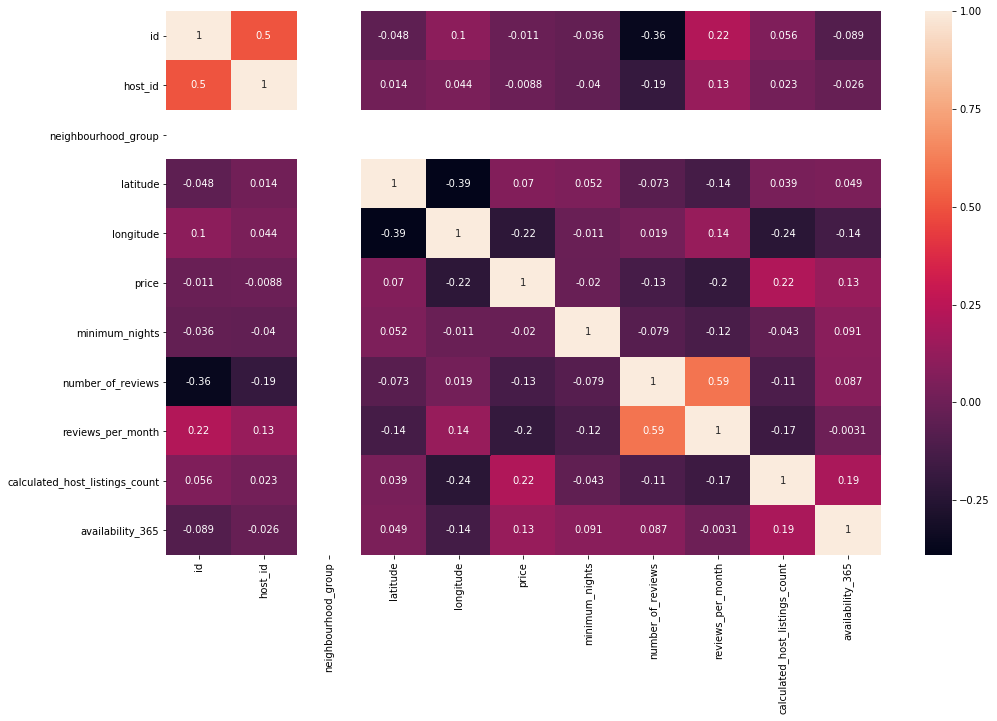

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(list1.corr(), annot=True)
plt.show()

In [16]:
list2.corr()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,1.000000e+00,-1.509418e-14,NaN,NaN,NaN,5.023711e-01,NaN,9.595213e-02,9.595213e-02,NaN,...,1.307009e-02,-6.121612e-03,1.482747e-02,-4.964830e-02,-3.709594e-02,-3.685570e-03,3.252992e-03,0.544105,5.589487e-02,2.190167e-01
scrape_id,-1.509418e-14,1.000000e+00,NaN,NaN,NaN,-6.385425e-14,NaN,-7.942307e-15,-7.942307e-15,NaN,...,-9.508941e-17,1.232986e-15,-1.397915e-15,-3.689533e-15,2.770798e-15,9.225636e-16,-3.879761e-17,NaN,5.634759e-15,-2.427466e-15
thumbnail_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,5.023711e-01,-6.385425e-14,NaN,NaN,NaN,1.000000e+00,NaN,-4.531052e-02,-4.531052e-02,NaN,...,-3.971501e-03,-1.524850e-02,-1.069454e-02,-2.902830e-02,-1.806762e-02,1.733113e-02,-2.713881e-03,0.349217,2.306194e-02,1.343158e-01
host_acceptance_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,9.595213e-02,-7.942307e-15,NaN,NaN,NaN,-4.531052e-02,NaN,1.000000e+00,1.000000e+00,NaN,...,-1.011727e-01,-7.517644e-02,-1.903692e-02,-1.104183e-01,-1.115537e-01,-7.629006e-02,-1.249959e-01,-0.287226,4.879620e-01,-9.176096e-02
host_total_listings_count,9.595213e-02,-7.942307e-15,NaN,NaN,NaN,-4.531052e-02,NaN,1.000000e+00,1.000000e+00,NaN,...,-1.011727e-01,-7.517644e-02,-1.903692e-02,-1.104183e-01,-1.115537e-01,-7.629006e-02,-1.249959e-01,-0.287226,4.879620e-01,-9.176096e-02
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


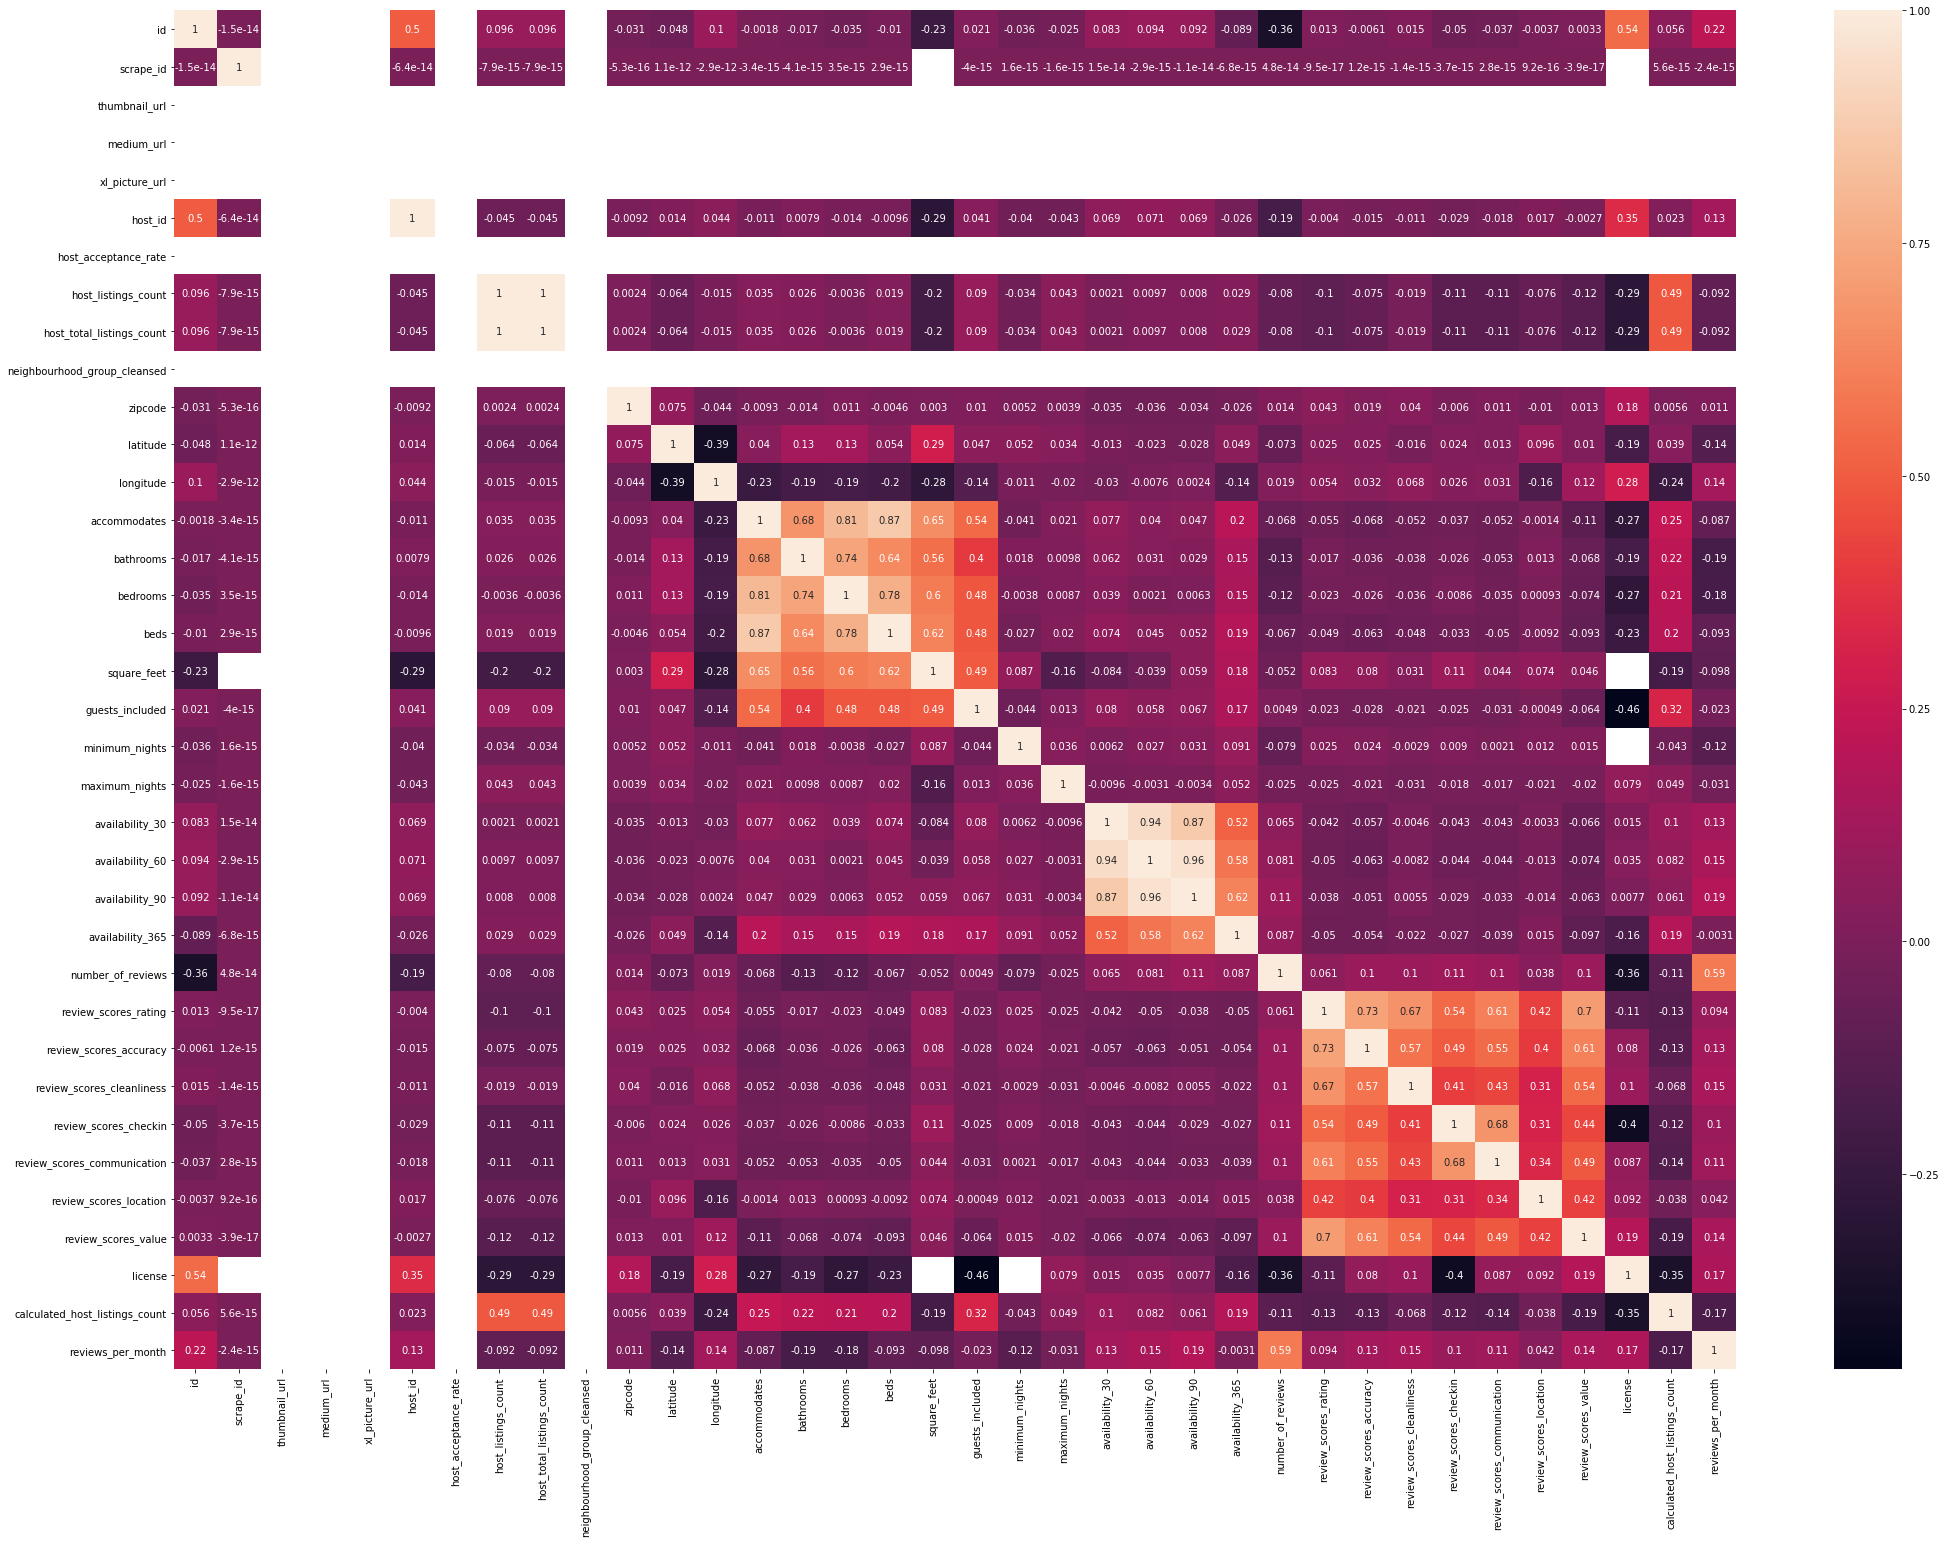

In [17]:
plt.figure(figsize=(35,25))
sns.heatmap(list2.corr(), annot=True)
plt.show()

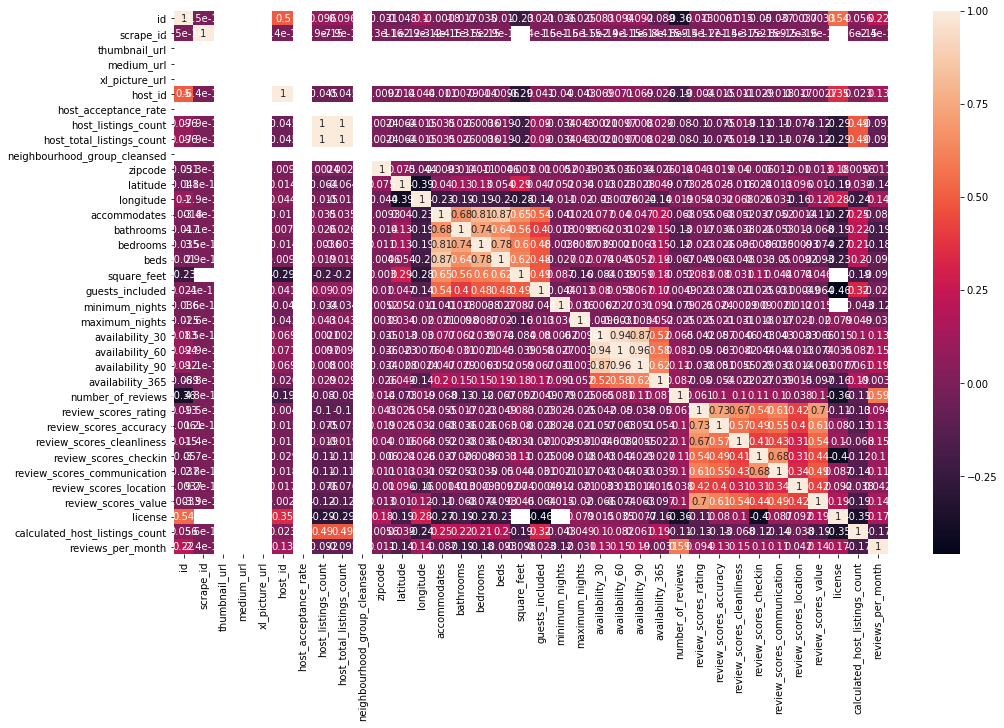

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(list2.corr(), annot=True)
plt.show()

In [19]:
review1.corr()


,listing_id
listing_id,1.0


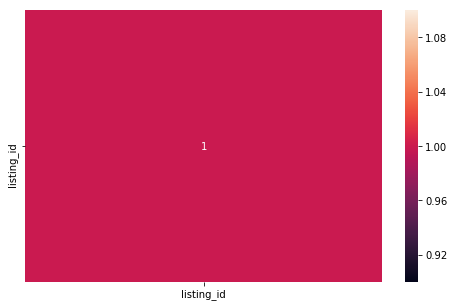

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(review1.corr(), annot=True)
plt.show()

In [21]:
review2.corr()


,listing_id,id,reviewer_id
listing_id,1.00000,0.610620,0.317910
id,0.61062,1.000000,0.462666
reviewer_id,0.31791,0.462666,1.000000


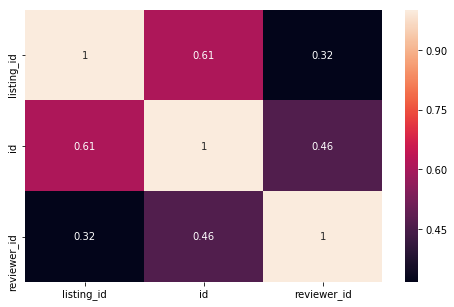

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(review2.corr(), annot=True)
plt.show()

In [23]:
calender.corr()


,listing_id
listing_id,1.0


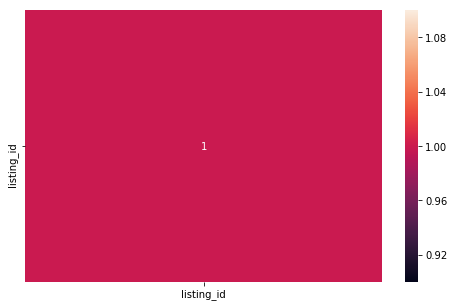

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(calender.corr(), annot=True)
plt.show()

In [25]:
neighbourdata.corr()

,neighbourhood_group
neighbourhood_group,NaN


# Correlated variables

Related/correlated Variables -
1. Bathroom,Bedrooms,beds with respect to accomodates
2. Availability scenario's - availability 30,60,90. 
3. Review score - review_scores_accuracy,review_scores_rating,review_score_cleaniness

# Features which can be eliminated

Features with missing values can be dropped as its not useful to have any insight on analysis

neighbourhoods table - neighbourhood_group - no values and neighbourhood does not have any trend and most of them are unique so can be dropped
 

In [26]:
neighbourdata['neighbourhood'].value_counts()

Alta Vista                 1
Eastlake Vistas            1
Lincoln Park               1
La Jolla Village           1
Bay Park                   1
City Heights East          1
Little Italy               1
Clairemont Mesa            1
Rancho Bernadino           1
Oak Park                   1
Webster                    1
Linda Vista                1
Del Cerro                  1
Moreno Mission             1
Scripps Ranch              1
North City                 1
Bario Logan                1
College Area               1
North Clairemont           1
West University Heights    1
Egger Highlands            1
Ocean Beach                1
Lake Murray                1
East Village               1
Pacific Beach              1
Valencia Park              1
Columbia                   1
Kensington                 1
Paseo Ranchoero            1
Rancho Penasquitos         1
                          ..
Park West                  1
East Lake                  1
Kearny Mesa                1
Chollas View  

# Transforming Binary variables into numeric form and comparing similar entities eg whether host identity verified with superhost or not and more......

In [27]:
calender['is_available'] = calender['available'].apply(lambda x: 1 if x == 't' else 0)
calender = calender.drop('available', axis=1)
calender.head()

,listing_id,date,price,is_available
0,635756,2019-11-14,$67.00,1
1,292285,2019-11-14,NaN,0
2,292285,2019-11-13,NaN,0
3,292285,2019-11-12,NaN,0
4,292285,2019-11-11,NaN,0


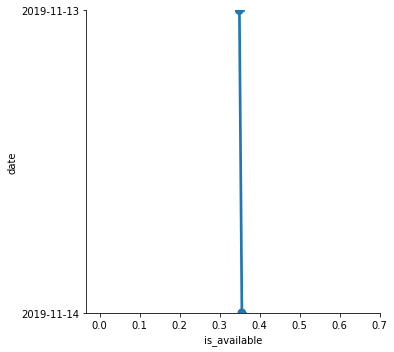

In [20]:
h = sns.PairGrid(data=calender, x_vars=['is_available'], y_vars='date', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))

In [14]:
list2['host_is_superhost_numeric'] = list2['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
list2 = list2.drop('host_is_superhost', axis=1)
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_identity_verified_numeric,host_is_superhost_numeric
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18,0,1
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN,1,0
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56,1,0
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f,1,3.33,1,1
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f,1,0.06,0,0


In [12]:
list2['host_identity_verified_numeric'] = list2['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
list2 = list2.drop('host_identity_verified', axis=1)
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_identity_verified_numeric
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18,0
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN,1
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56,1
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f,1,3.33,1
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f,1,0.06,0


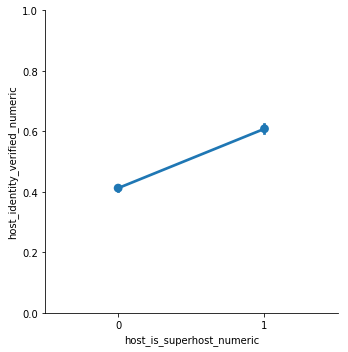

In [15]:
h = sns.PairGrid(data=list2, x_vars=['host_is_superhost_numeric'], y_vars='host_identity_verified_numeric', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))

In [23]:
#h = sns.PairGrid(data=list2,data=calender, x_vars=['host_is_superhost_numeric'], y_vars='is_available', size=5)
#h.map(sns.pointplot)
#h.set(ylim=(0, 1))

In [24]:
list2['instant_bookable_numeric'] = list2['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)
list2 = list2.drop('instant_bookable', axis=1)
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_identity_verified_numeric,host_is_superhost_numeric,instant_bookable_numeric
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,f,1,1.18,0,1,1
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,f,2,NaN,1,0,0
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,f,1,1.56,1,0,0
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,t,f,1,3.33,1,1,0
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,moderate,f,f,1,0.06,0,0,0


In [25]:
list2['require_guest_phone_verification_numeric'] = list2['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)
list2 = list2.drop('require_guest_phone_verification', axis=1)
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,host_identity_verified_numeric,host_is_superhost_numeric,instant_bookable_numeric,require_guest_phone_verification_numeric
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,1,1.18,0,1,1,0
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,2,NaN,1,0,0,0
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,1,1.56,1,0,0,0
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,t,1,3.33,1,1,0,0
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,moderate,f,1,0.06,0,0,0,0


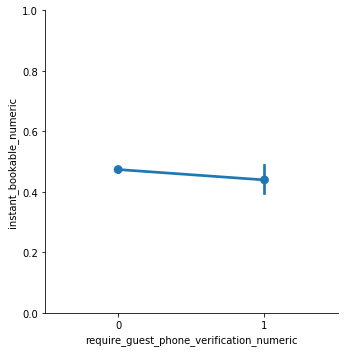

In [30]:
h = sns.PairGrid(data=list2, x_vars=['require_guest_phone_verification_numeric'], y_vars='instant_bookable_numeric', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))

1.Here we can see that mostly superhost identity is verified as per above graphical analysis,
2.Also Verification rate is a point of concern while instant booking time which can lead to security impact. 

# Visualization & Analysis  of features via plots & graphs

In [9]:
#_=plt.hist('bedrooms')
#plt.show()

In [8]:
#_ = sns.swarmplot(x='accommodates', y='bathrooms', data=list2)
#_ = plt.xlabel('accommodates')
#_ = plt.ylabel('bathrooms')
#plt.show()

Box plot over different parameter with respect to room type

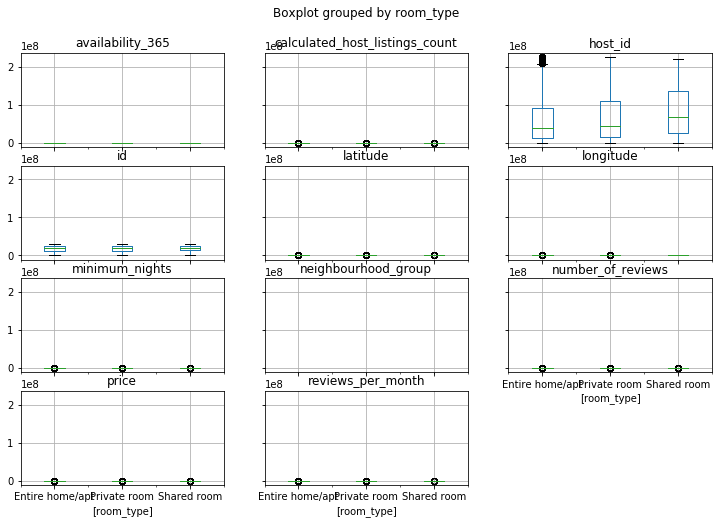

In [69]:
#box_plot_data=[x='accommodates', y='bathrooms', data=list2]
list1.boxplot(by='room_type', figsize=(12,8));
#plt.boxplot(box_plot_data)
#plt.show()

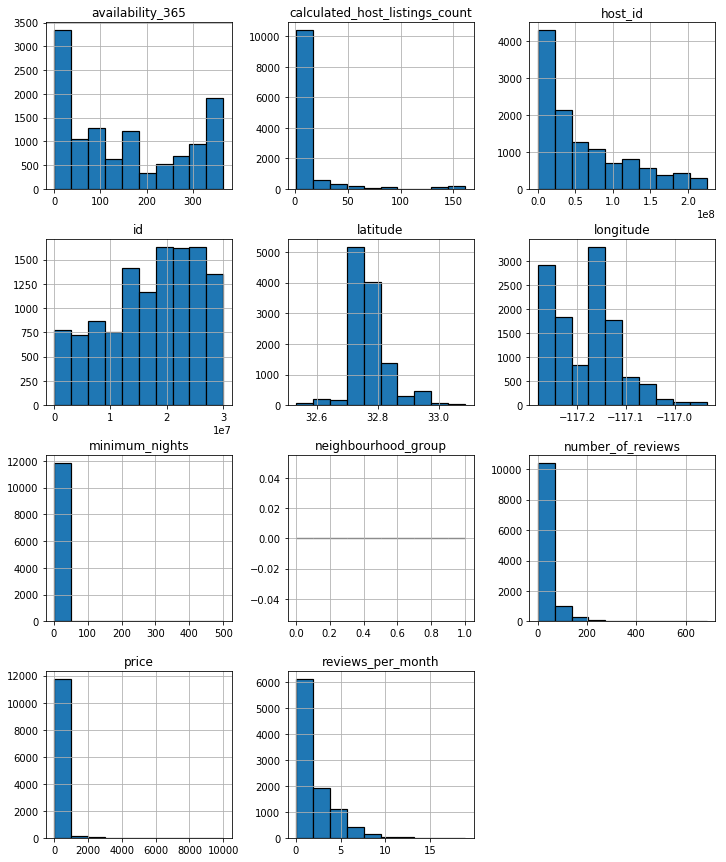

In [39]:
list1.hist(edgecolor='black', linewidth=1.2, figsize=(12,15));
plt.show();

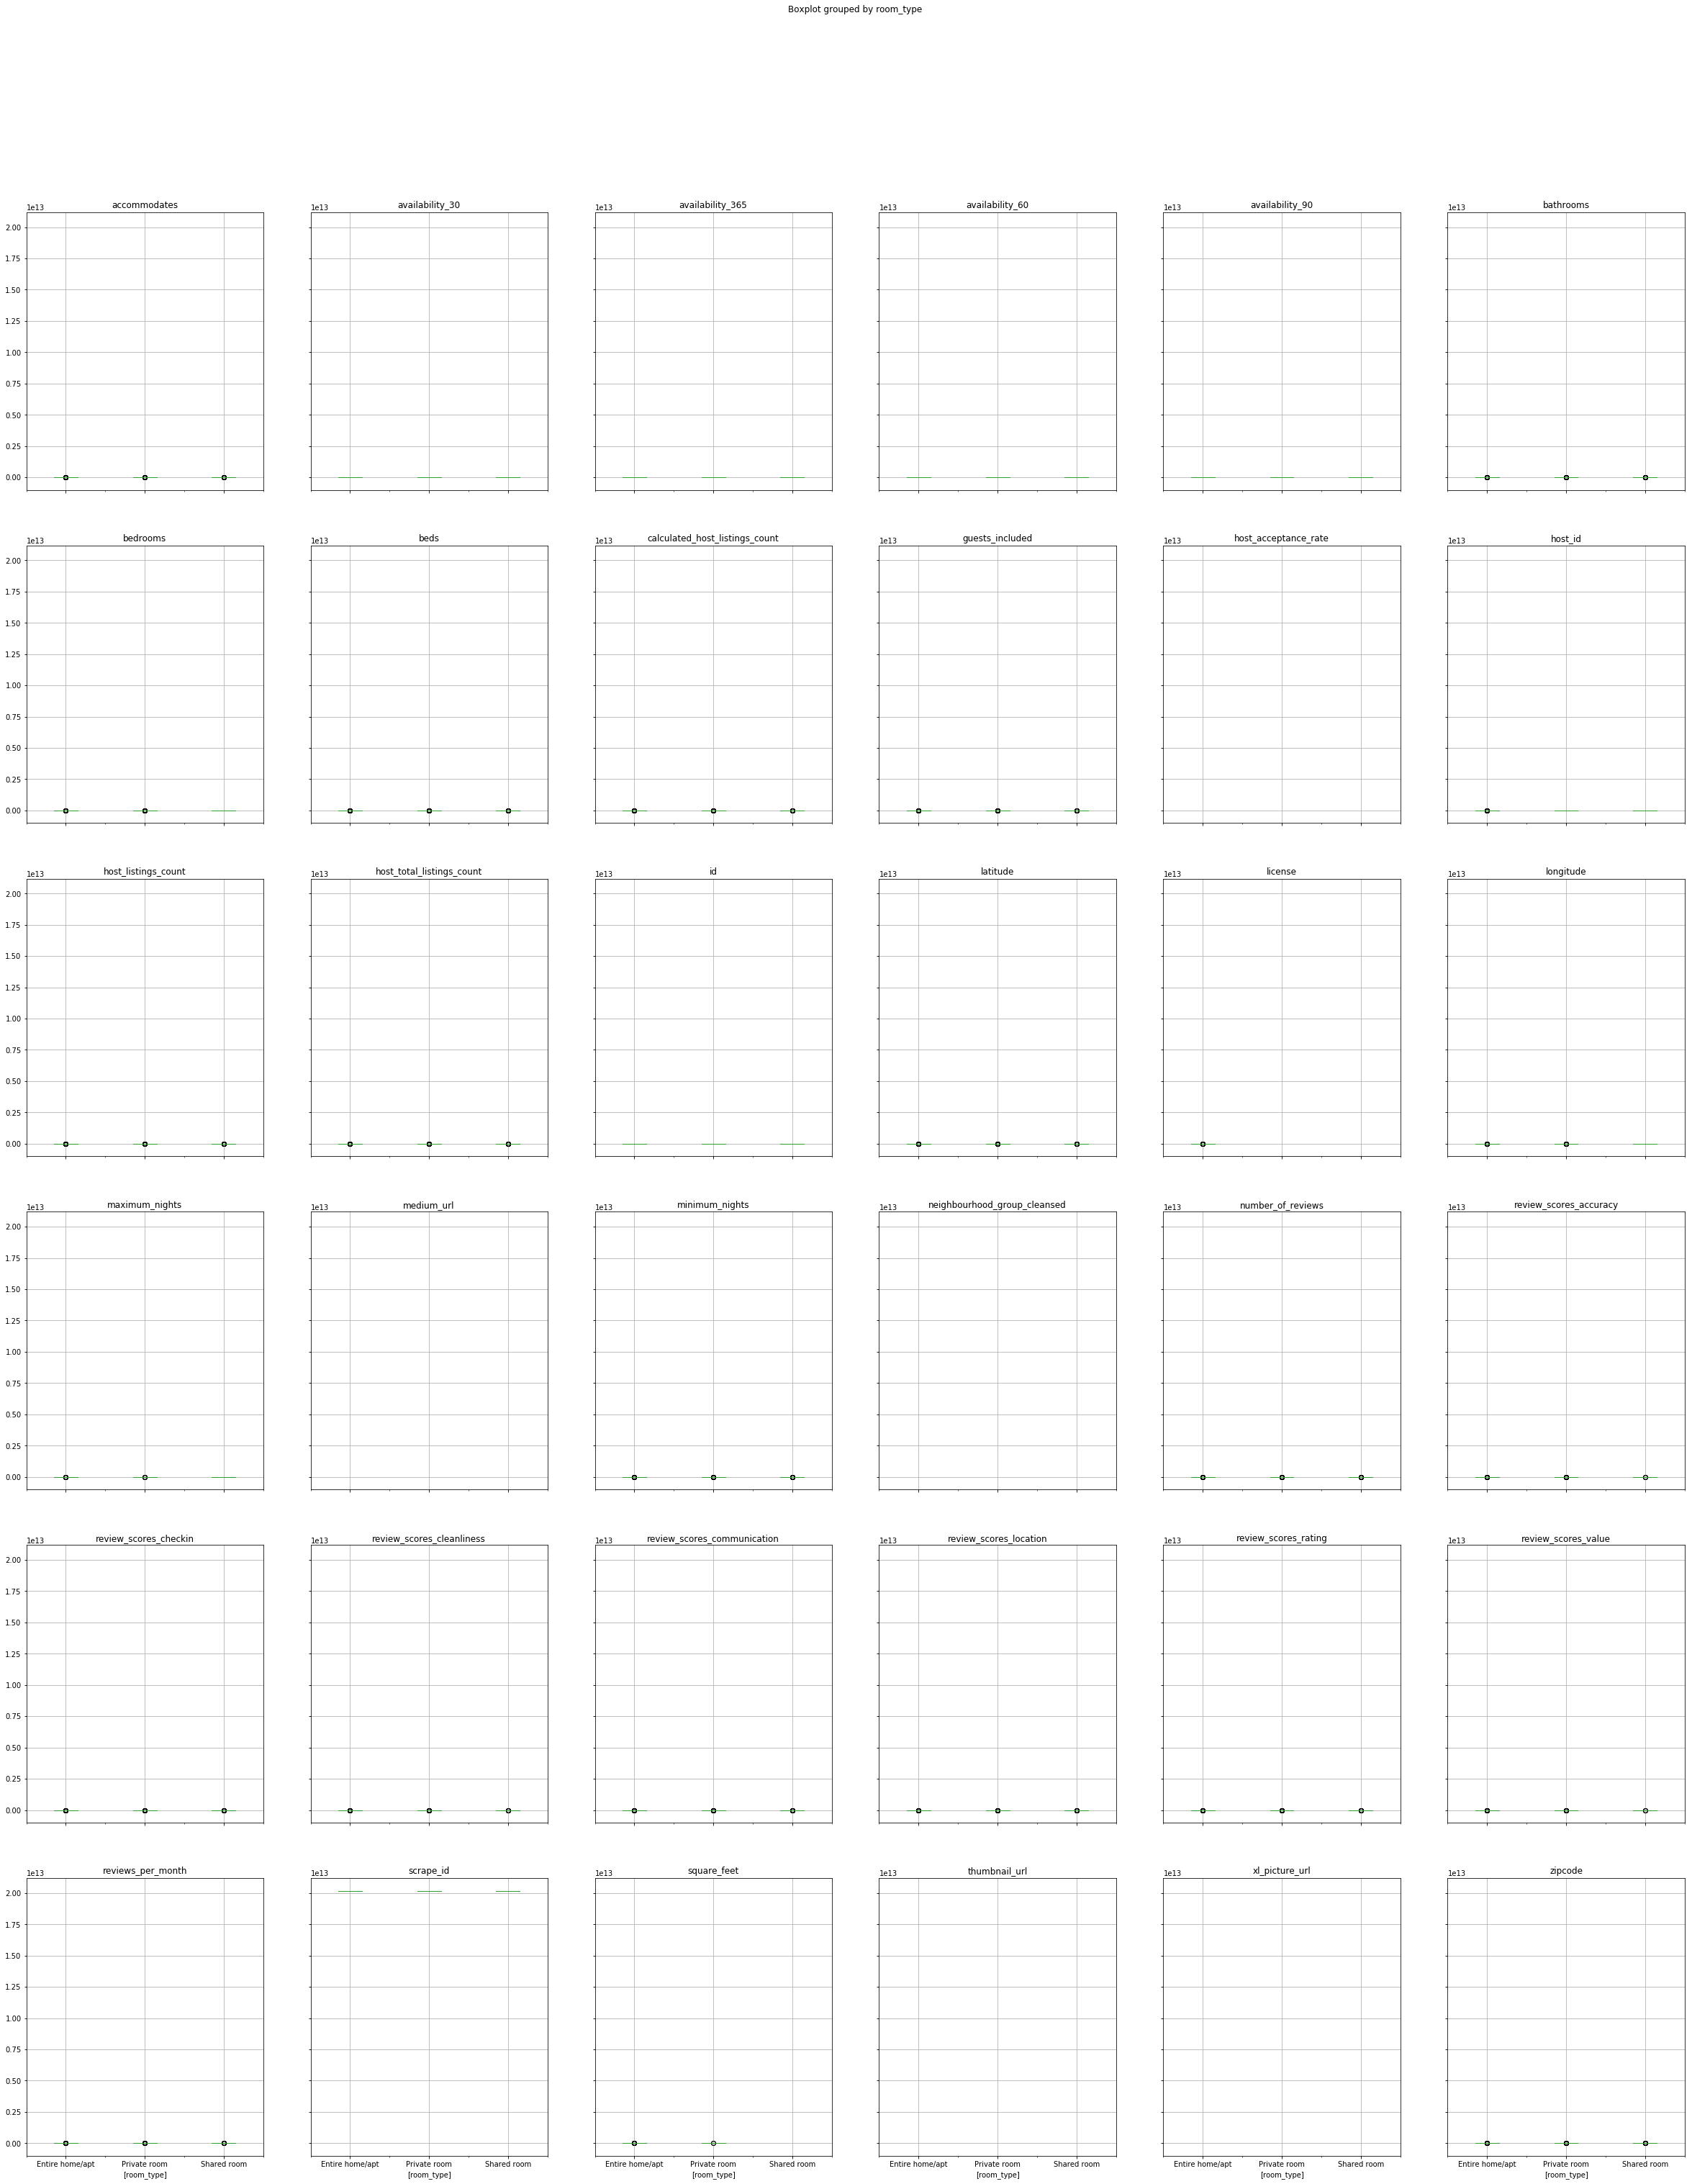

In [5]:
list2.boxplot(by='room_type', figsize=(40,50));

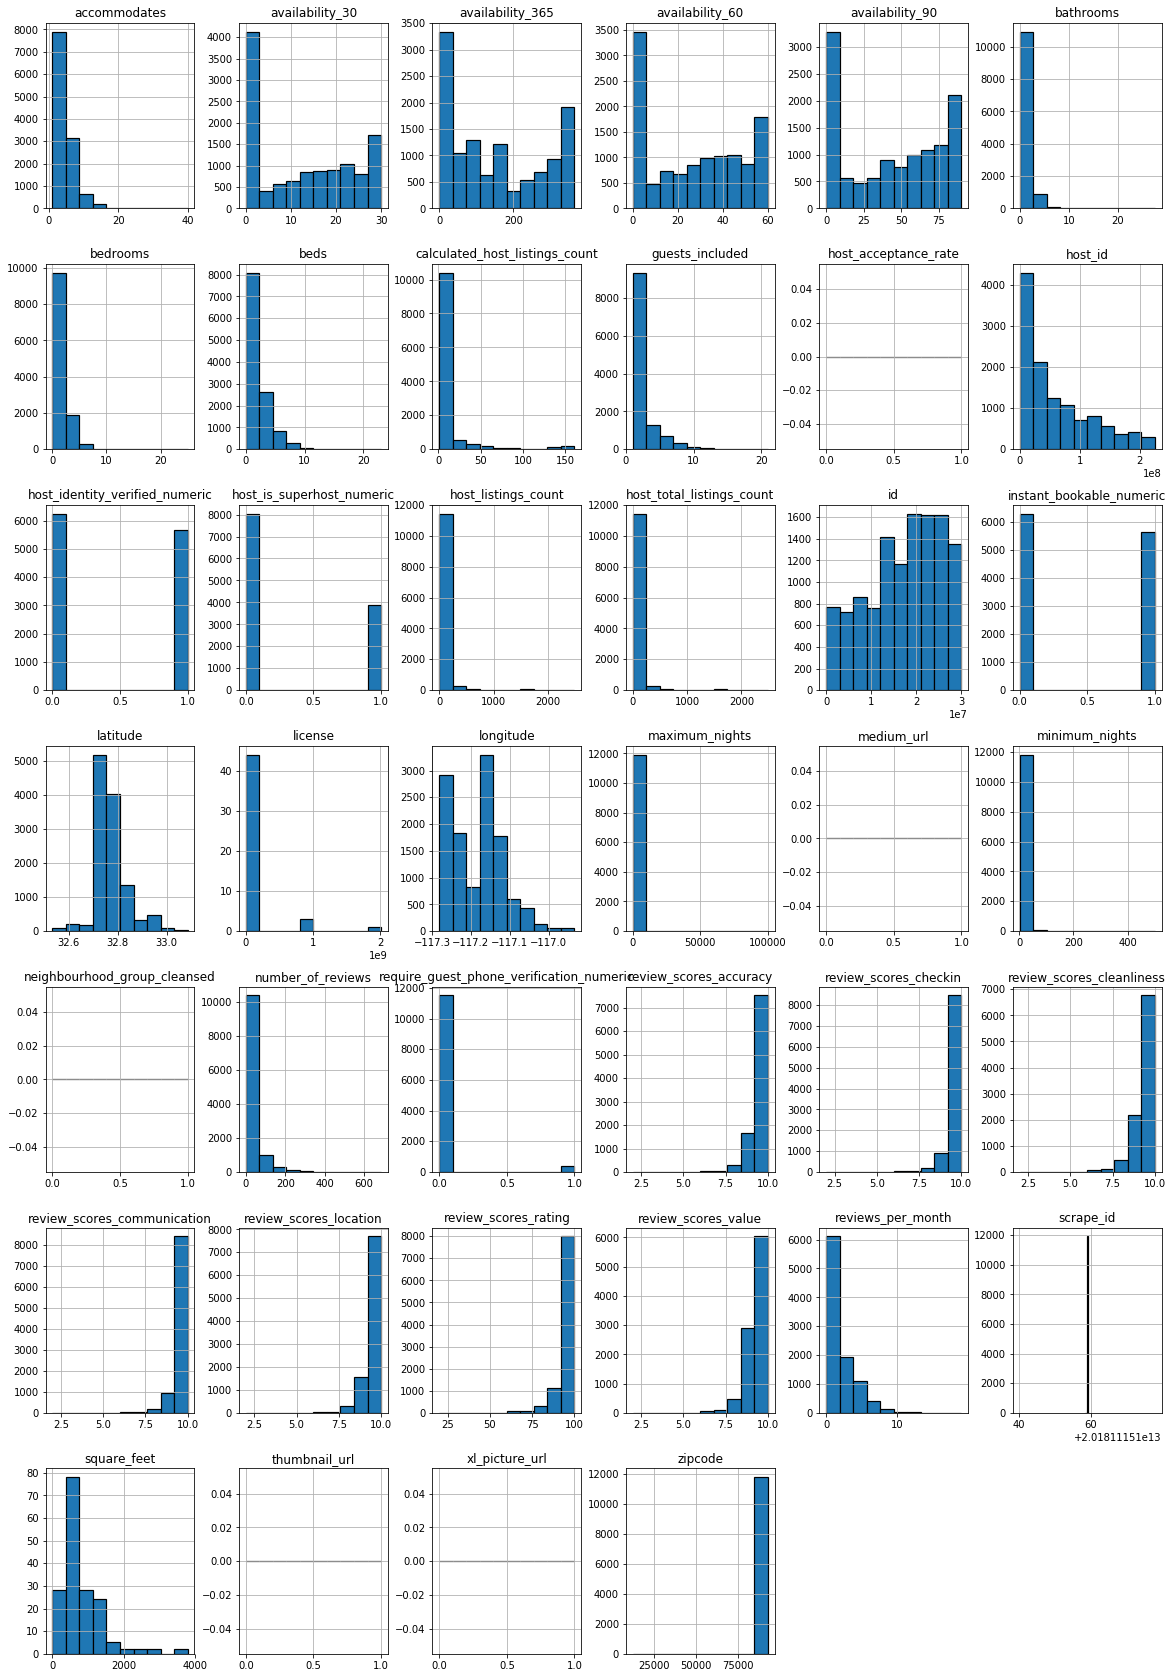

In [42]:
list2.hist(edgecolor='black', linewidth=1.2, figsize=(20,30));
plt.show();

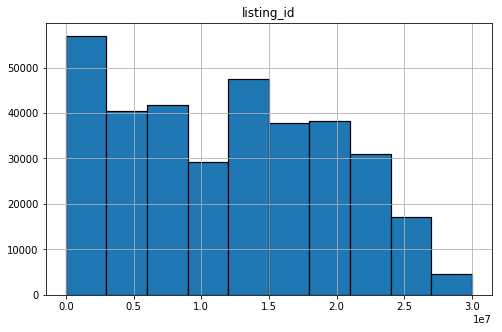

In [48]:
review1.hist(edgecolor='black', linewidth=1.2, figsize=(8,5));
plt.show();

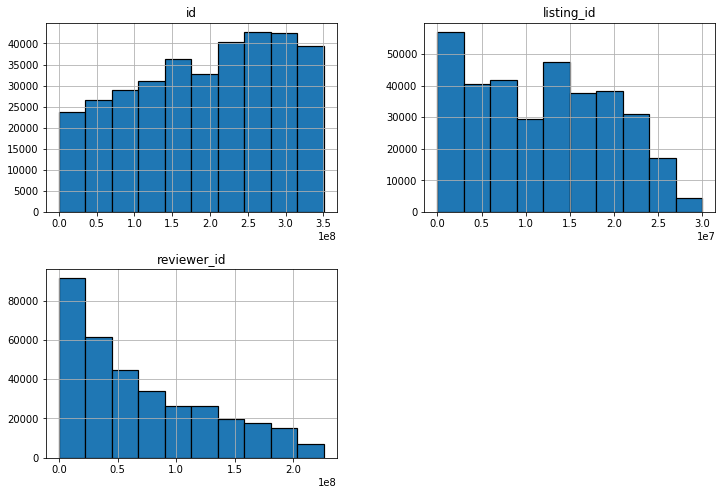

In [45]:
review2.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

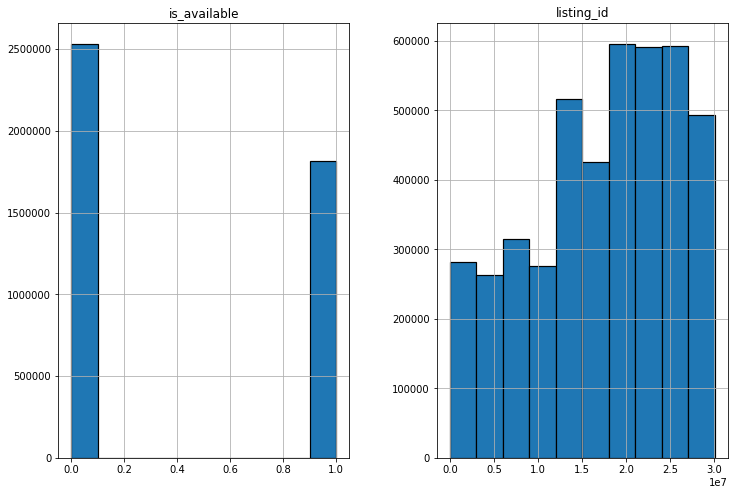

In [46]:
calender.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

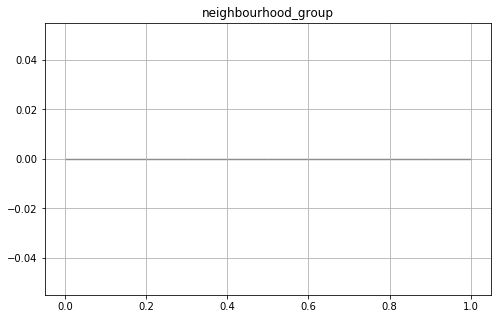

In [27]:
neighbourdata.hist(edgecolor='black', linewidth=1.2, figsize=(8,5));
plt.show();

# Modelling considering room_type as target variable

In [6]:
X, y = list2.drop(['room_type'], axis=1), list2['room_type']

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [8]:
y.value_counts()

Entire home/apt    8304
Private room       3426
Shared room         192
Name: room_type, dtype: int64

In [18]:
list2['is_room_type'] = list2['room_type'].apply(lambda x: 2 if x == 'Entire home/apt' else(1 if x== 'Private room' else 0))

In [19]:
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,is_room_type
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18,2
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN,2
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56,2
3,39516,https://www.airbnb.com/rooms/39516,20181115100559,2018-11-15,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f,1,3.33,2
4,45429,https://www.airbnb.com/rooms/45429,20181115100559,2018-11-15,OB cottage SD--view on waterway,This charming independent cottage nestles besi...,"This 1 bd ~500 sq ft. ground level, independe...",This charming independent cottage nestles besi...,none,NaN,...,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f,1,0.06,2


In [20]:
X, y = list2.drop(['is_room_type'], axis=1), list2['is_room_type']

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [24]:
y.value_counts()

2    8304
1    3426
0     192
Name: is_room_type, dtype: int64

In [25]:
def build_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

In [1]:
#decision_tree = build_classifier(GradientBoostingClassifier) - need to bring features in numeric form.